# Ekhator Uwaila's Notebook

## Question 1

1.	(20 points, Effort 20%) Use with a dataset different from IRIS the following technique:https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html  (scikit)
Explain why this technique is important.


#### Why the 'Feature Importance' Technique is Important?
Feature importance is a machine learning technique that involves calculating the score for all input features in a model to establish the importance of each feature in the decision-making process. The higher the score for a feature, the larger effect it has on the model to predict a certain variable.   
Feature importance scores play an important role in a predictive modeling project, including providing insight into the data, insight into the model, and the basis for dimensionality reduction and feature selection that can improve the efficiency and effectiveness of a predictive model on the problem.

Feature Importance Score can help with the following:

- Provinde a better understanding of the dataset. The relative scores can highlight which features may be most relevant to the target, and vice versa, which features are the least relevant. This can be used as the basis for gathering more or different data.

- Provide insight into the model. Most importance scores are calculated by a predictive model that has been fit on the dataset. Inspecting the importance score provides insight into that specific model and which features are the most important and least important to the model when making a prediction.

- Improve a predictive model. This can be achieved by using the importance scores to select those features to delete (lowest scores) or those features to keep (highest scores). This can simplify the problem that is being modeled, speed up the modeling process (deleting features is called dimensionality reduction), and in some cases, improve the performance of the model.
- 
[Reference 1](https://builtin.com/data-science/feature-importance)
[Reference 2](https://machinelearningmastery.com/calculate-feature-importance-with-python/)

Ill use the Pima Indians Diabetes Dataset to illustrate the Feature Importance Technique:

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [3]:
#Load the dataset
pima_diabetes = pd.read_csv('https://gist.githubusercontent.com/SoumenAtta/e00bd5cb6ed13a983bf48b845325c837/raw/d5e3560b8bfe97ba126b5e94bed4487c2b1ed787/diabetes.csv')
pima_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#Extracting the feature variables
X = pima_diabetes.drop(columns=['Outcome'])
y = pima_diabetes['Outcome'] 

In [9]:
#test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=100)

In [16]:
#Fitting a random forest classifier to compute the feature importances
feature_names = list(pima_diabetes.columns)[0:-1]
forest = RandomForestClassifier(random_state=100)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=100)

#### Feature importance based on mean decrease in impurity

In [31]:
import time

import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.021 seconds


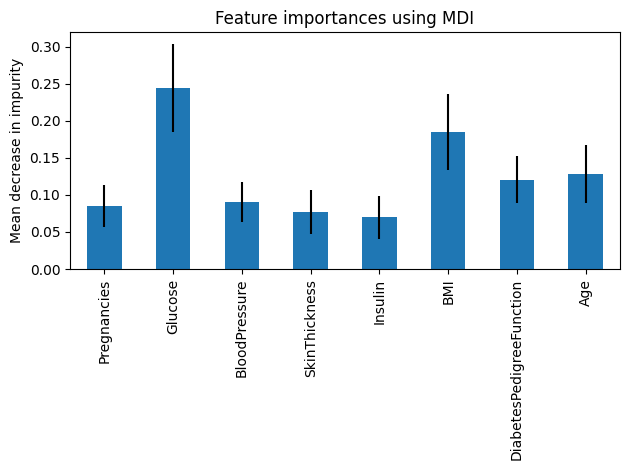

In [32]:
import matplotlib.pyplot as plt
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

From the diagram above we can see that Glucose and BMI are the most important features in determining Diabetes.

#### Feature importance based on feature permutation

In [28]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    forest, X_test, y_test, n_repeats=10, random_state=100, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")



Elapsed time to compute the importances: 12.436 seconds


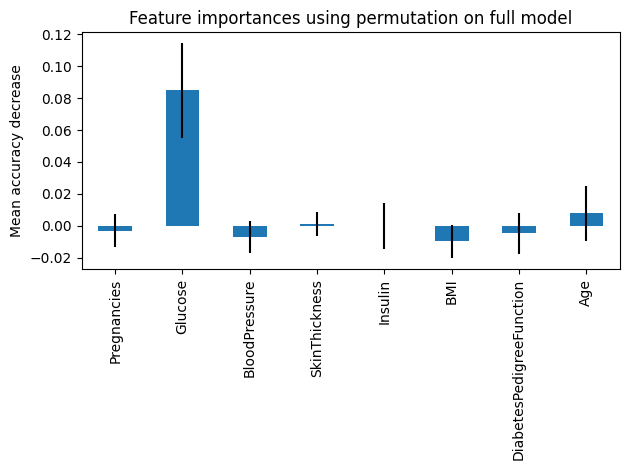

In [29]:
forest_importances2 = pd.Series(result.importances_mean, index=feature_names)

fig, ax = plt.subplots()
forest_importances2.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

Using feature permutation we still have Glucose and BMI as most important, however their values are smaller compared to MDI. This is because it removes any biases that may have occured in the MDI method. Also we can see from the elapsed time to compute the importances that the Feture Permutation approach is more computationally expensive.

## Question 2 
(20 points, Effort 10%) Compare, by discussing the results, the technique in 1 with the coefficients (W) of the logistic regression. (You can use scikit)

In [24]:
from sklearn.linear_model import LogisticRegression

In [27]:
logistic = LogisticRegression(solver = "lbfgs", C = 1).fit(X_train, y_train)

# Display the coefficients
feature_names = X.columns
log_reg_coefs = pd.Series(data = logistic.coef_[0], index = feature_names)
print(log_reg_coefs)

Pregnancies                 0.129164
Glucose                     0.035256
BloodPressure              -0.013194
SkinThickness               0.005805
Insulin                    -0.001634
BMI                         0.089291
DiabetesPedigreeFunction    0.925966
Age                         0.011906
dtype: float64


/Users/uwailaekhator/anaconda3/envs/NLP/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


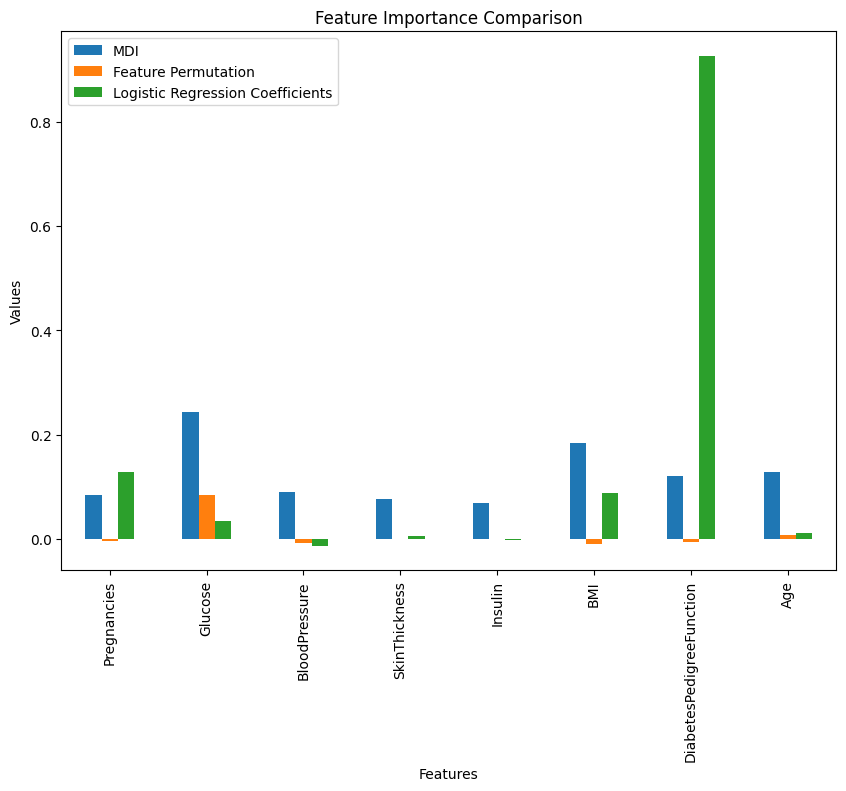

In [35]:
#combine the three results into a single DataFrame
comparison_df = pd.concat([forest_importances, forest_importances2, log_reg_coefs], axis=1)
comparison_df.columns = ['MDI', 'Feature Permutation', 'Logistic Regression Coefficients']

#plot the DataFrame as a bar plot
comparison_df.plot(kind='bar', figsize=(10, 7))
plt.title('Feature Importance Comparison')
plt.ylabel('Values')
plt.xlabel('Features')
plt.show()

We can see that using the Logistic Regression Coefficients,  the Diabetes Pedigree Function is the most important feature. However using the MDI Feature Importance Glucose is the most important feature.

## Question 3
(30 points, Effort 35%) Consider the IRIS dataset and any binary classification version (e.g., iris-setosa versus others). This dataset is imbalanced; please implement a technique by using oversampling that will produce a balanced dataset (no duplication). Implement it by using K-means to generate such data. Help: You can use the following code  https://gist.github.com/firestrand/e8cfc001768e555aafad673ac62df566

In [61]:
import numpy as np
from sklearn.utils import shuffle

#load the Iris dataset
iris = load_iris()
X, y = iris['data'], iris['target']

#identify the minority class
minority_class = 0  #considering iris-setosa as the minority class

#getting indices of minority class samples
minority_indices = np.where(y == minority_class)[0]

#extracting minority class samples
X_minority = X[minority_indices]

#applying K-means clustering to the minority class samples
n_clusters = len(minority_indices) // 2 
kmeans = KMeans(n_clusters=n_clusters, random_state=100)
kmeans.fit(X_minority)

#generate synthetic samples for the minority class using cluster centers
synthetic_samples = []
for center in kmeans.cluster_centers_:
    synthetic_samples.append(center + np.random.randn(*center.shape)) 
#converting the list of synthetic samples to a NumPy array
synthetic_samples = np.array(synthetic_samples)

#combining the original majority class samples with the synthetic minority class samples
X_balanced = np.vstack((X, synthetic_samples))
y_balanced = np.hstack((y, np.full(len(synthetic_samples), minority_class)))

#shuffling the balanced dataset
X_balanced, y_balanced = shuffle(X_balanced, y_balanced, random_state=42)


/Users/uwailaekhator/anaconda3/envs/NLP/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [62]:
X_balanced

array([[ 5.64258823,  2.9054111 ,  1.27354485, -1.01781251],
       [ 6.7       ,  3.        ,  5.2       ,  2.3       ],
       [ 5.8       ,  2.7       ,  5.1       ,  1.9       ],
       [ 6.1       ,  3.        ,  4.9       ,  1.8       ],
       [ 6.9       ,  3.1       ,  5.1       ,  2.3       ],
       [ 6.9       ,  3.1       ,  5.4       ,  2.1       ],
       [ 4.4       ,  3.2       ,  1.3       ,  0.2       ],
       [ 5.7       ,  4.4       ,  1.5       ,  0.4       ],
       [ 6.2       ,  2.8       ,  4.8       ,  1.8       ],
       [ 6.7       ,  3.1       ,  4.4       ,  1.4       ],
       [ 6.8       ,  3.        ,  5.5       ,  2.1       ],
       [ 5.        ,  2.        ,  3.5       ,  1.        ],
       [ 4.8       ,  3.        ,  1.4       ,  0.3       ],
       [ 6.4       ,  3.2       ,  4.5       ,  1.5       ],
       [ 5.4       ,  3.4       ,  1.5       ,  0.4       ],
       [ 4.9       ,  3.1       ,  1.5       ,  0.1       ],
       [ 5.7       ,  2.

In [63]:
y_balanced

array([0, 2, 2, 2, 2, 2, 0, 0, 2, 1, 2, 1, 0, 1, 0, 0, 2, 1, 0, 0, 2, 0,
       2, 0, 1, 0, 2, 0, 0, 1, 0, 0, 0, 1, 2, 2, 2, 0, 0, 2, 2, 1, 2, 0,
       1, 0, 0, 1, 2, 0, 0, 1, 2, 1, 0, 1, 0, 2, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 2, 0, 0, 0, 2, 0, 2, 2, 1, 0, 1, 0, 0, 2, 0, 0, 2, 1,
       1, 1, 0, 2, 1, 2, 0, 2, 0, 1, 2, 0, 1, 1, 0, 2, 2, 2, 1, 0, 2, 2,
       2, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 2, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 2, 0, 1, 0, 2, 2, 0, 1, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0,
       2, 0, 0, 0, 1, 2, 2, 0, 2, 1, 2, 1, 1, 2, 0, 0, 1, 2, 0, 1, 2])

## Question 4
(10 points, Effort 5%) Describe the main differences between K-means and DB-Scan, and use examples.

K-Means cluster is an unsupervised machine learning clustering techniques. It is a centroid based clustering technique that needs you decide the number of clusters (centroids) and randomly places the cluster centroids to begin the clustering process. The goal is to divide N observations into K clusters repeatedly until no more groups can be formed.<br><br>
DBSCAN is a density-based clustering algorithm that forms clusters of dense regions of data points ignoring the low-density areas (considering them as noise). DBSCAN uses the following two user defined parameters for clustering:<br>
- Epsilon (eps): It is defined as the maximum distance between two points to be considered as neighboring points (belonging to the same cluster).
- Minimum Points (min_samples or minPts): This defines the minimum number of neighboring points that a given point needs to be considered a core data point. This includes the point itself. For example, if minimum number of points is set to 4, then a given point needs to have 3 or more neighboring data points to be considered a core data point.

If the minimum number of points meet the epsilon distance requirement then they are considered as a cluster.

#### Main Differences
- DBSCAN is a density-based clustering algorithm, whereas K-Means is a centroid-based clustering algorithm.
- DBSCAN can discover clusters of arbitrary shapes, whereas K-Means assumes that the clusters are spherical.
- DBSCAN does not require the number of clusters to be specified in advance, whereas K-Means requires the number of clusters to be specified.
- DBSCAN is less sensitive to initialization than K-Means.

#### Examples
- Scenario 1: If working with spatial/geographical data, that has to do with how hospitals are located around a city. These data points of the different hospital locations are scattered all around the city and can form arbitrary shapes. Also we may not know the amount of clusters needed for this in advance. In this case the DBSCAN is a good choice.

- Scenario 2: If working with an ecommercee custormer data. This data includes information about the customer such as age, purchasing frequency, amount spent, etc It is easy to set the number of clusters (K), it can be set based on age group, or grouping the purchasing frequency, or grouping the amount of money spent on average. In this case KMEANS is a better choice.

[Reference1](https://towardsdatascience.com/k-means-vs-dbscan-clustering-49f8e627de27) <br>
[Reference2](https://www.newhorizons.com/resources/blog/dbscan-vs-kmeans-a-guide-in-python#:~:text=Differences%20between%20the%20two%20algorithms,that%20the%20clusters%20are%20spherical.)

## Question 5
(30 points, Effort 10%) Implement fit and predict procedures for the K-means algorithm that also automatically estimates the optimal number of clusters in the K-means algorithm. (do not use scikit except for the K-means algorithm and the Silhouette coefficient)

I will be using the Iris dataset to answer this question.

In [44]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [42]:
iris = load_iris()
X,y=iris['data'],iris['target']
X=StandardScaler().fit_transform(X)

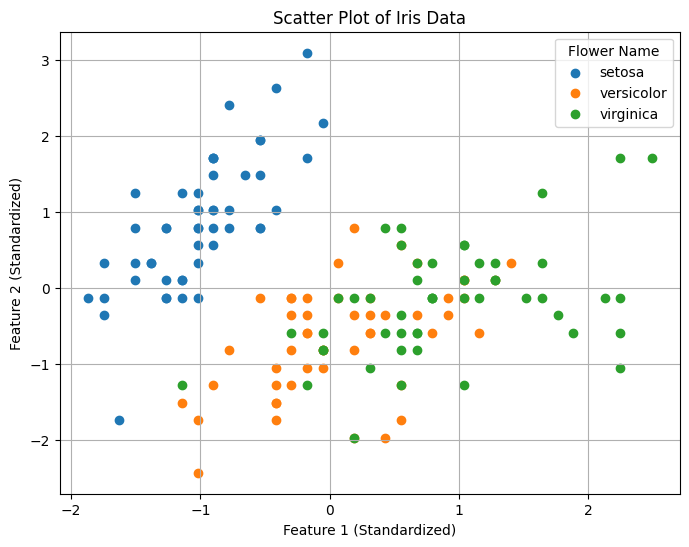

In [47]:
#Scatter plot Of originl data
plt.figure(figsize=(8, 6))


for target_class in range(3):
    plt.scatter(X[y == target_class, 0], X[y == target_class, 1], label=iris['target_names'][target_class])

plt.title('Scatter Plot of Iris Data')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.legend(title='Flower Name')
plt.grid(True)
plt.show()

From the above, we can see the original plot of the iris dataset. Now i would use the elbow method to identify the optimal number of clusters:

In [45]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)#loss function kmean

/Users/uwailaekhator/anaconda3/envs/NLP/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/uwailaekhator/anaconda3/envs/NLP/lib/python3.9/site-packages/threadpoolctl.py:1010: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)
/Users/uwailaekhator/anaconda3/envs/NLP/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` 

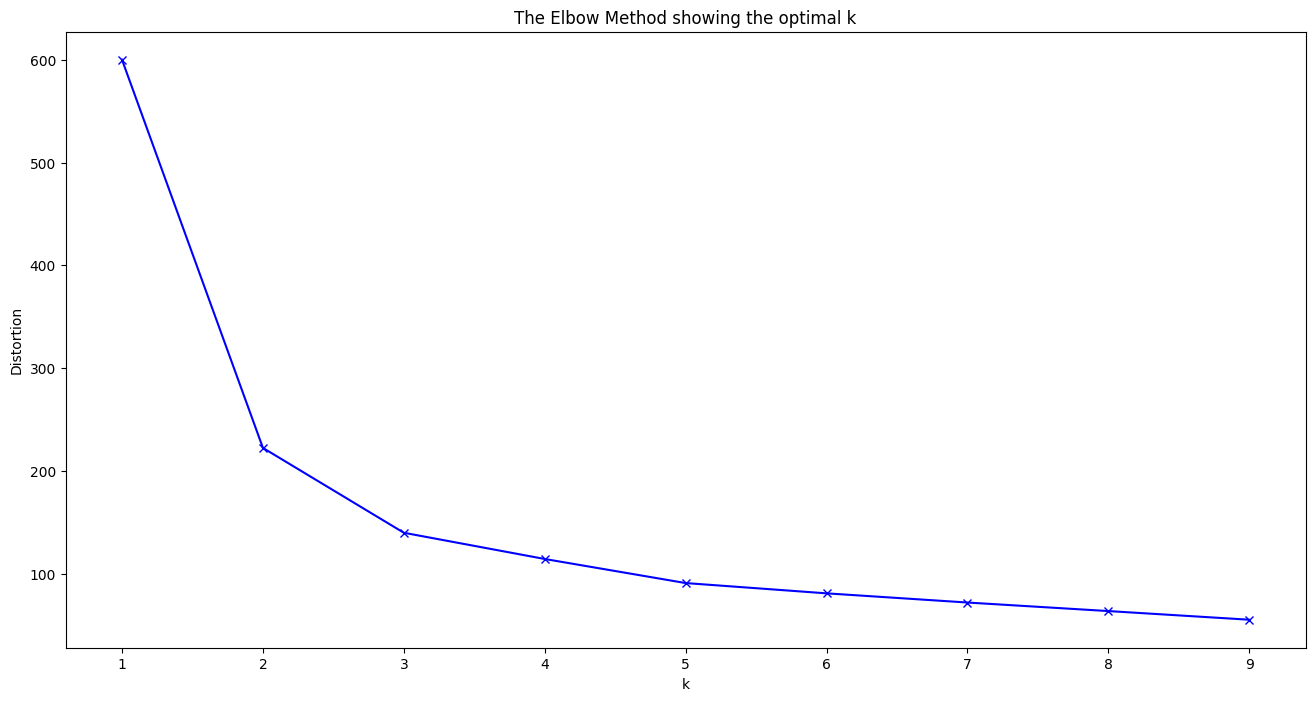

In [46]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

From the diagram above, we can see that k=3 is the optimal number of clusters for the Iris dataset, I will now fit the KMEANS algorithm to the iris data using K=3:

In [48]:
# Fit K-means with the optimal number of clusters
optimal_k = 3 
kmeans = KMeans(n_clusters=optimal_k)
kmeans.fit(X)
predicted_labels = kmeans.predict(X)

/Users/uwailaekhator/anaconda3/envs/NLP/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


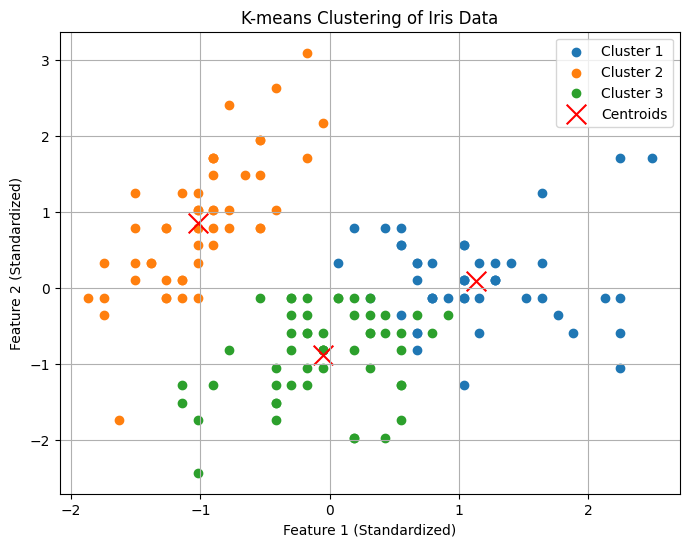

In [49]:
# Plot the clustered data
plt.figure(figsize=(8, 6))
for target_class in range(optimal_k):
    plt.scatter(X[predicted_labels == target_class, 0], X[predicted_labels == target_class, 1], label=f'Cluster {target_class + 1}')

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids', marker='x')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.title('K-means Clustering of Iris Data')
plt.legend()
plt.grid(True)
plt.show()

In [51]:
from sklearn import metrics


In [52]:
# Evaluating the quality of clusters
s = metrics.silhouette_score(X, predicted_labels, metric='euclidean')
print(f"Silhouette Coefficient: {s:.2f}")

Silhouette Coefficient: 0.46


I also computed the silhouette score for various k values, and as we can see below our optimal k=3 from the elbow method gave the highest silhouette score. <br>
The Silhouette score is a metric used to evaluate how good clustering results are in data clustering.

In [60]:
silhouette_scores = [(k, metrics.silhouette_score(X, KMeans(n_clusters=k).fit_predict(X), metric='euclidean')) for k in range(2, 10)]
for k, score in silhouette_scores:
    print(f"k = {k}, Silhouette Score = {score:.2f}")

k = 2, Silhouette Score = 0.58
k = 3, Silhouette Score = 0.46
k = 4, Silhouette Score = 0.39
k = 5, Silhouette Score = 0.35
k = 6, Silhouette Score = 0.33
k = 7, Silhouette Score = 0.33
k = 8, Silhouette Score = 0.32
k = 9, Silhouette Score = 0.34


/Users/uwailaekhator/anaconda3/envs/NLP/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/uwailaekhator/anaconda3/envs/NLP/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/uwailaekhator/anaconda3/envs/NLP/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/uwailaekhator/anaconda3/envs/NLP/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: